In [1]:
import pandas as pd 
import nltk
import nltk.tokenize as tk 
import matplotlib.pyplot as plt
import re as re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
import numpy as np
from nltk.tag import pos_tag
from nltk.tokenize import MWETokenizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

C:\Users\dtpz2\Documents\anaconda\envs\mlops\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dtpz2\Documents\anaconda\envs\mlops\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dtpz2\Documents\anaconda\envs\mlops\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\dtpz2\Documents\anaconda\envs\mlops\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
## NLTK downloads (uncomment the next 4 lines, only need to run once)
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')

In [3]:
# Load CSV
df = pd.read_csv('../data/raw/news_excerpts_parsed.csv')

# Check the first few rows
print("Dataset Preview:")
print(df.head())

# Summary of the dataset
print("\nDataset Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Preview:
                                                Link  \
0  https://edition.cnn.com/2023/09/29/business/st...   
1  https://www.channelnewsasia.com/singapore/su-w...   
2  https://edition.cnn.com/2023/05/22/tech/meta-f...   
3  https://www.channelnewsasia.com/singapore/bill...   
4  https://edition.cnn.com/2024/03/05/politics/li...   

                                                Text  
0  Starbucks violated federal labor law when it i...  
1  The first suspect to plead guilty in Singapore...  
2  Meta has been fined a record-breaking €1.2 bil...  
3  SINGAPORE: A 45-year-old man linked to Singapo...  
4  The Department of Education imposed a record $...  

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Link    1509 non-null   object
 1   Text    1509 non-null   object
dtypes: object(2)
memory usage: 23.7+ KB
None

M

No null rows

## Text pre-processing pipeline
### Steps:
1. Remove punctuation and special characters
2. Convert to lowercase
3. Tokenize
4. Remove stopwords
5. Lemmatize

In [4]:
# Define pre-processing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
mwe_tokenizer = MWETokenizer()

### Preserve key figures using regex
Example: "Meta was fined 1.2 billion dollars" → Extract 1.2 billion.

In [5]:
# Function to extract key figures (e.g., 1.2 billion, 500 million)
def extract_key_figures(text):
    # Regex to match patterns like "1.2 million", "500 billion"
    pattern = r'(\d+(\.\d+)?\s?(million|billion|trillion))'
    matches = re.findall(pattern, text.lower())
    # Return matched figures as a list (only the full match group is needed)
    return [match[0] for match in matches]

#### Text pre-processing

In [6]:
# Function to clean text but retain key figures
def clean_text_with_figures(text):
    # Extract key figures from the text
    key_figures = extract_key_figures(text)
    # Remove special characters but retain key figures
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove everything except letters and spaces
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    # Add back the key figures to the token list
    tokens.extend(key_figures)  # Ensure key_figures is added correctly
    return tokens


In [7]:
# Apply extraction and cleaning
df['key_figures'] = df['Text'].apply(lambda x: extract_key_figures(str(x)))
df['cleaned_tokens'] = df['Text'].apply(lambda x: clean_text_with_figures(str(x)))
#print(df.head())

In [8]:
# Check results
print("\nCleaned Data with Key Figures:")
print(df[['Text', 'key_figures', 'cleaned_tokens']].head())


Cleaned Data with Key Figures:
                                                Text  \
0  Starbucks violated federal labor law when it i...   
1  The first suspect to plead guilty in Singapore...   
2  Meta has been fined a record-breaking €1.2 bil...   
3  SINGAPORE: A 45-year-old man linked to Singapo...   
4  The Department of Education imposed a record $...   

                  key_figures  \
0                          []   
1    [3 billion, 2.2 billion]   
2  [1.2 billion, 1.3 billion]   
3  [118 million, 131 million]   
4     [14 million, 2 million]   

                                      cleaned_tokens  
0  [starbucks, violate, federal, labor, law, incr...  
1  [first, suspect, plead, guilty, singapore, lar...  
2  [meta, fin, record, break, billion, billion, e...  
3  [singapore, year, old, man, link, singapore, l...  
4  [department, education, impose, record, millio...  


#### Data Visualisation (check if data is in ML usable format)


Generating Word Cloud...


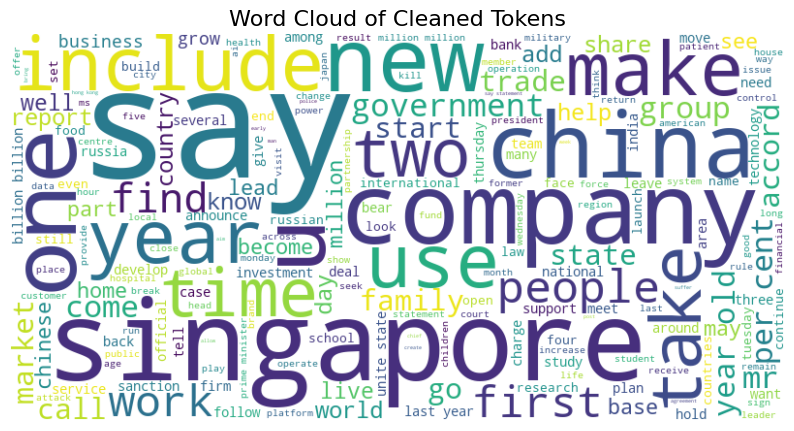

In [9]:
# Visualization: Word Cloud
print("\nGenerating Word Cloud...")
all_words = ' '.join([' '.join(tokens) for tokens in df['cleaned_tokens']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Tokens", fontsize=16)
plt.show()

In [10]:
# Save cleaned data to a new CSV
output_path = '../data/processed/news_excerpts_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned data saved to: {output_path}")


Cleaned data saved to: ../data/processed/news_excerpts_cleaned.csv
